In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('X_test.csv')

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [4]:
df['Sex'] = df['Sex'].replace(['M','F'],['1','0'])
df = pd.get_dummies(df, prefix=['Equipment'], columns=['Equipment'])

scaler = MinMaxScaler()
df[['Age', 'BodyweightKg', 'BestSquatKg','BestDeadliftKg']] = scaler.fit_transform(df[['Age', 'BodyweightKg', 'BestSquatKg','BestDeadliftKg']])

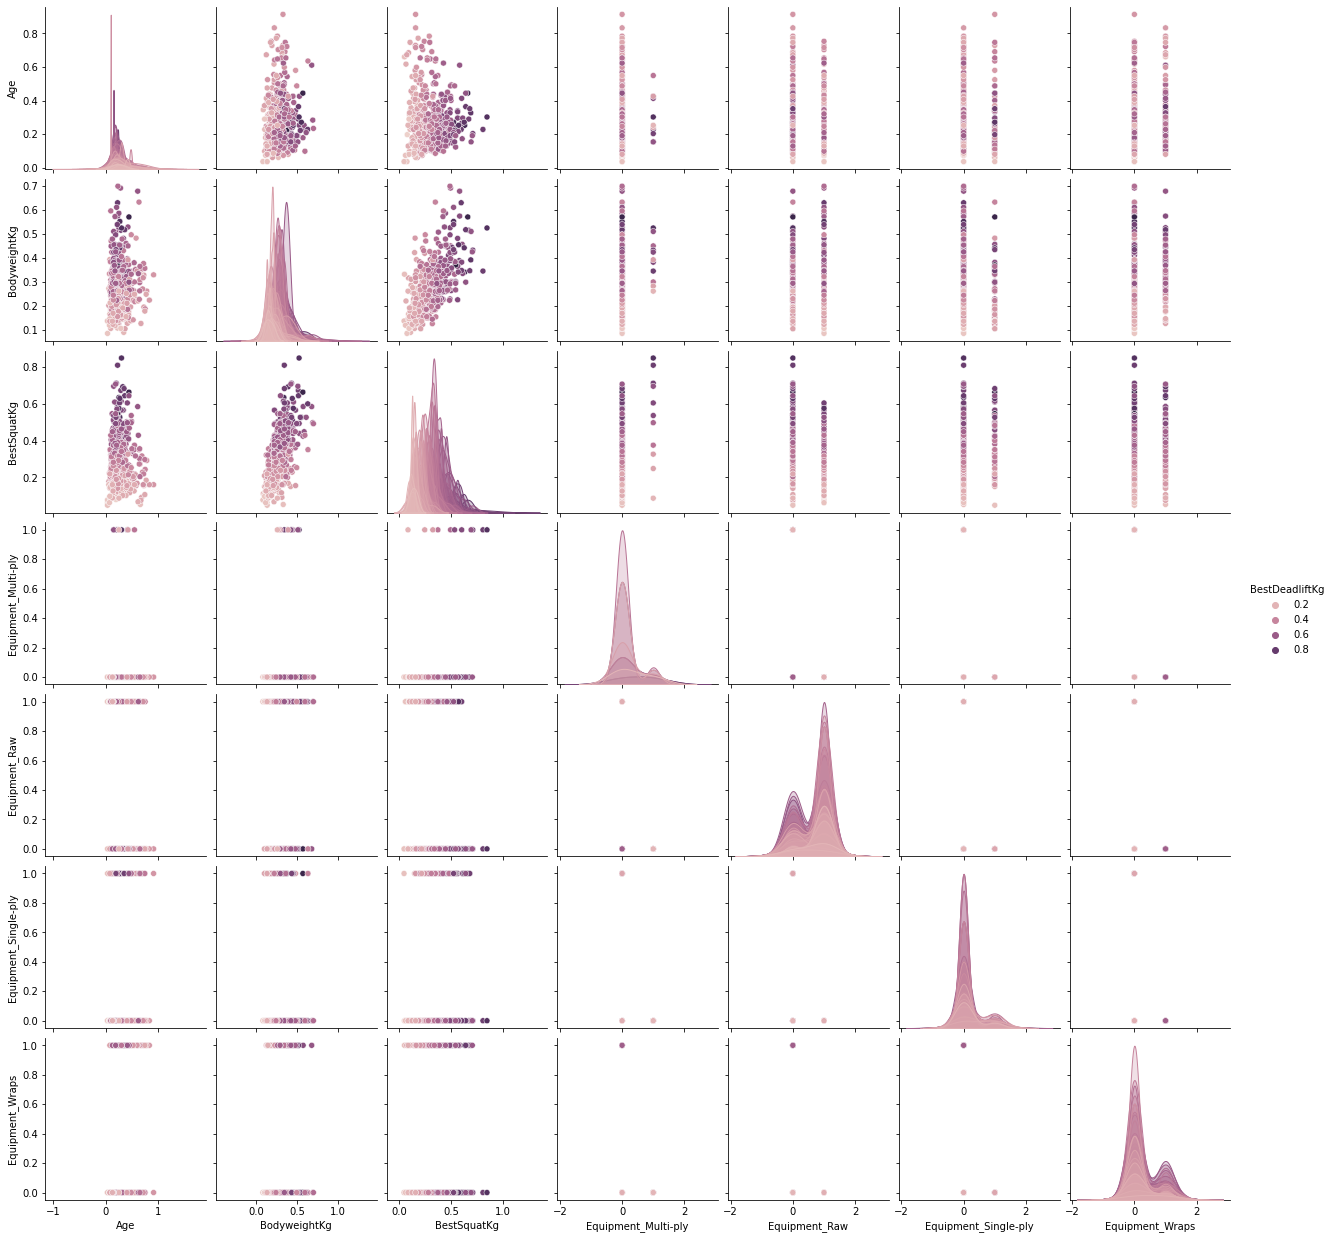

In [5]:
df_sample = df[['Sex','Age','BodyweightKg','BestSquatKg','Equipment_Multi-ply','Equipment_Raw','Equipment_Single-ply','Equipment_Wraps','BestDeadliftKg']]
df_sample = df_sample.sample(frac=0.05)
pplot = sns.pairplot(df_sample, hue="BestDeadliftKg")

In [6]:
X = df[['Sex','Age','BodyweightKg','BestSquatKg','Equipment_Multi-ply','Equipment_Raw','Equipment_Single-ply','Equipment_Wraps']]
y = df['BestDeadliftKg']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
pred = model.predict(X_test)

In [10]:
print("r2_score : ", r2_score(y_test, pred))
print("mse : ", mean_squared_error(y_test, pred))
print("rmse : ", np.sqrt(mean_squared_error(y_test, pred)))

r2_score :  0.8678710974934981
mse :  0.0032473870518982795
rmse :  0.056985849575998074
